In [26]:
!pip install pillow

In [27]:
!pip install requests

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

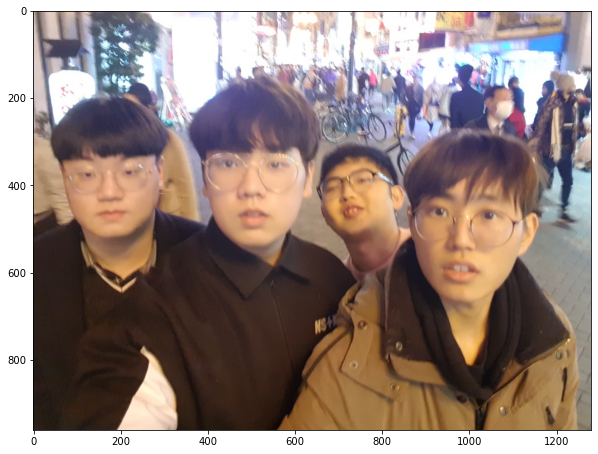

In [116]:
img = mpimg.imread("./day2/14.jpg")

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [88]:
import requests

In [117]:
client_id = "f4AKRVTREX8a4U6Jyic8"
client_secret = "42DKFZZ2E6"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('./day2/14.jpg','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [118]:
import json

In [119]:
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1280,
            "height": 961
        },
        "faceCount": 7
    },
    "faces": [
        {
            "celebrity": {
                "value": "양한열",
                "confidence": 0.01
            }
        },
        {
            "celebrity": {
                "value": "사와이미유",
                "confidence": 0.01
            }
        },
        {
            "celebrity": {
                "value": "박영진",
                "confidence": 0.46404
            }
        },
        {
            "celebrity": {
                "value": "최재우",
                "confidence": 0.293113
            }
        },
        {
            "celebrity": {
                "value": "서영진",
                "confidence": 0.01
            }
        },
        {
            "celebrity": {
                "value": "조하진",
                "confidence": 0.01
            }
        },
        {
            "celebrity": {
                "value": "파비앙",
     

In [120]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('./day2/14.jpg','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1280,
            "height": 961
        },
        "faceCount": 7
    },
    "faces": [
        {
            "roi": {
                "x": 89,
                "y": 318,
                "width": 187,
                "height": 187
            },
            "landmark": {
                "leftEye": {
                    "x": 128,
                    "y": 367
                },
                "rightEye": {
                    "x": 221,
                    "y": 363
                },
                "nose": {
                    "x": 173,
                    "y": 419
                },
                "leftMouth": {
                    "x": 141,
                    "y": 464
                },
                "rightMouth": {
                    "x": 215,
                    "y": 460
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999065
            },
           

In [121]:
detect_result = parsed

In [122]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [123]:
detect_result['faces']

[{'roi': {'x': 89, 'y': 318, 'width': 187, 'height': 187},
  'landmark': {'leftEye': {'x': 128, 'y': 367},
   'rightEye': {'x': 221, 'y': 363},
   'nose': {'x': 173, 'y': 419},
   'leftMouth': {'x': 141, 'y': 464},
   'rightMouth': {'x': 215, 'y': 460}},
  'gender': {'value': 'male', 'confidence': 0.999065},
  'age': {'value': '10~14', 'confidence': 0.875428},
  'emotion': {'value': 'neutral', 'confidence': 0.999997},
  'pose': {'value': 'frontal_face', 'confidence': 0.996319}},
 {'roi': {'x': 878, 'y': 405, 'width': 230, 'height': 230},
  'landmark': {'leftEye': {'x': 928, 'y': 458},
   'rightEye': {'x': 1039, 'y': 464},
   'nose': {'x': 981, 'y': 528},
   'leftMouth': {'x': 936, 'y': 586},
   'rightMouth': {'x': 1020, 'y': 598}},
  'gender': {'value': 'male', 'confidence': 0.736001},
  'age': {'value': '18~22', 'confidence': 0.149461},
  'emotion': {'value': 'talking', 'confidence': 0.999809},
  'pose': {'value': 'frontal_face', 'confidence': 0.999445}},
 {'roi': {'x': 669, 'y': 356,

In [124]:
detect_result['faces'][0]

{'roi': {'x': 89, 'y': 318, 'width': 187, 'height': 187},
 'landmark': {'leftEye': {'x': 128, 'y': 367},
  'rightEye': {'x': 221, 'y': 363},
  'nose': {'x': 173, 'y': 419},
  'leftMouth': {'x': 141, 'y': 464},
  'rightMouth': {'x': 215, 'y': 460}},
 'gender': {'value': 'male', 'confidence': 0.999065},
 'age': {'value': '10~14', 'confidence': 0.875428},
 'emotion': {'value': 'neutral', 'confidence': 0.999997},
 'pose': {'value': 'frontal_face', 'confidence': 0.996319}}

In [125]:
detect_result['faces'][0]['roi']

{'x': 89, 'y': 318, 'width': 187, 'height': 187}

In [126]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999065}

In [127]:
detect_result['faces'][0]['age']

{'value': '10~14', 'confidence': 0.875428}

In [128]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999997}

In [129]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [130]:
annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [131]:
import matplotlib.patches as patches

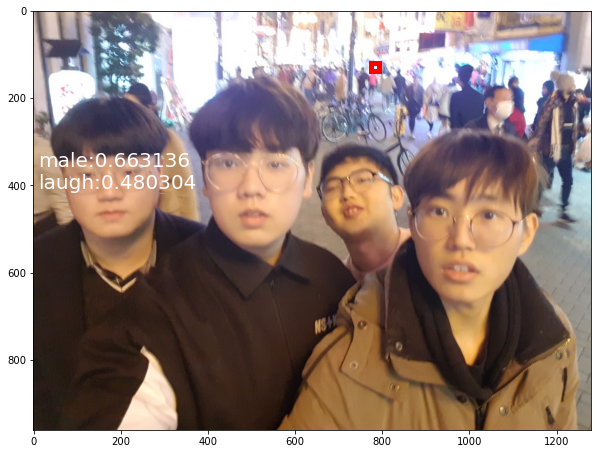

In [134]:
img = mpimg.imread('./day2/14.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=20, color='white')
plt.show()

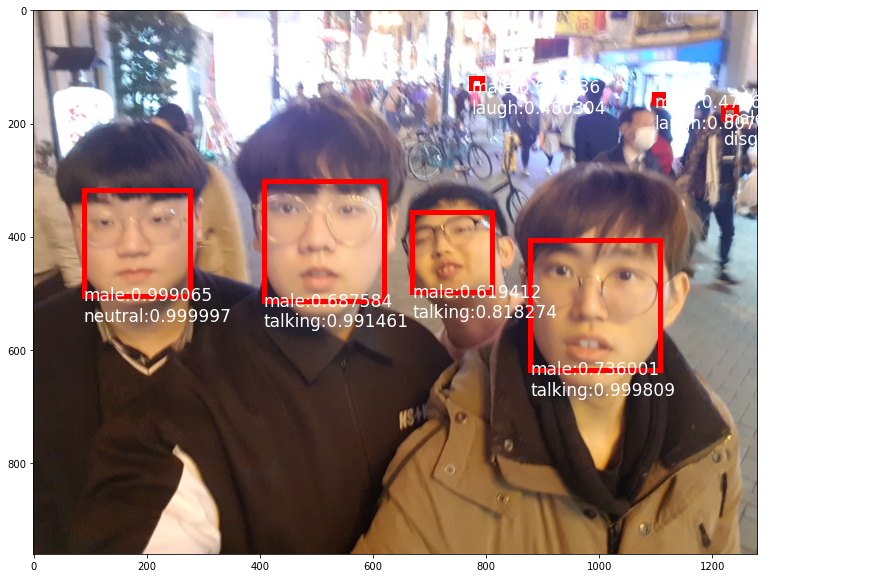

In [135]:
img = mpimg.imread('./day2/14.jpg')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='white')
    ax.add_patch(rect_face)

    
plt.show()